Drone Median: 6.0
Personnel Standart Deviation: 289.2839150906501
Aircraft Max Loss: 17.0


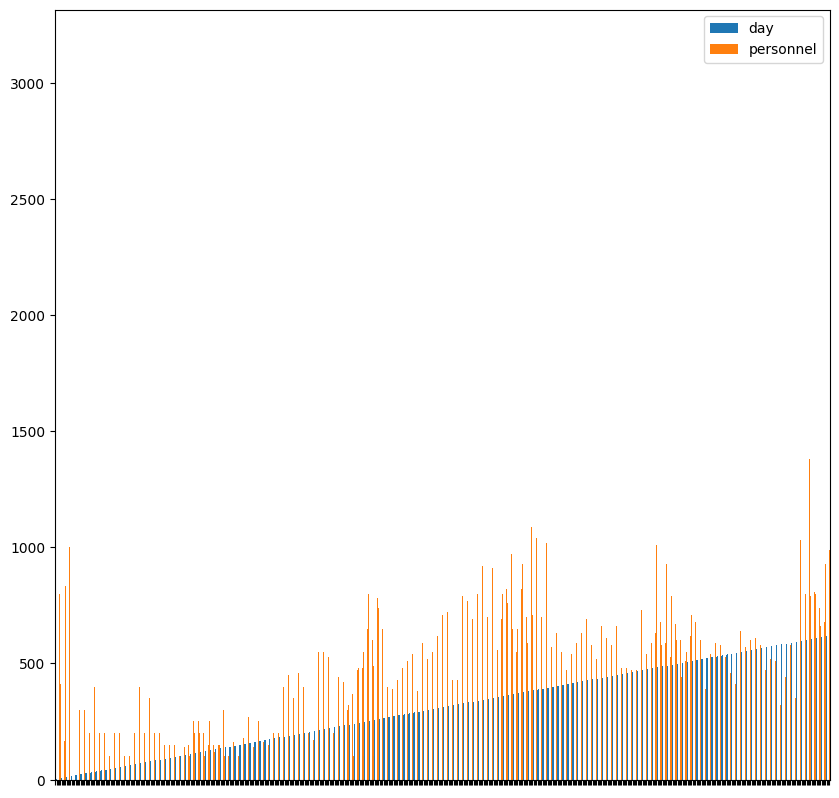

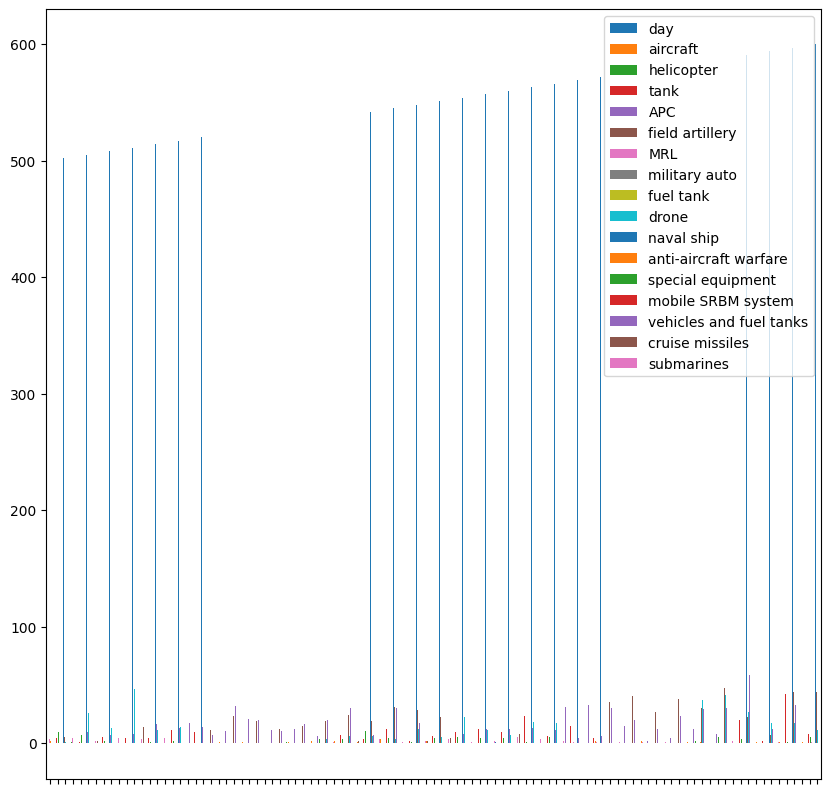

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

corrections_df = pd.read_csv('russia_losses_equipment_correction.csv')
equipment_df = pd.read_csv('russia_losses_equipment.csv')
personnel_df = pd.read_csv('russia_losses_personnel.csv')

equipment_df = equipment_df.fillna(0)

personnel_df = personnel_df.fillna(0)

def validate_col(col, df):
    df[f'{col}-prev'] = df[col].shift(1) 
    df[f'{col}-prev'].fillna(0, inplace=True)
    df[col] = df[col] - df[f'{col}-prev']
    df.drop(f'{col}-prev', axis=1, inplace=True)

equipment_df = equipment_df.drop('greatest losses direction', axis=1)
personnel_df = personnel_df.drop('personnel*', axis=1).drop('POW', axis=1)

equipment_columns = equipment_df.columns
personnel_columns = personnel_df.columns

for i in range(2, len(equipment_columns) - 1):
    validate_col(equipment_columns[i], equipment_df)

validate_col(personnel_columns[2], personnel_df)    

equipment_describe = equipment_df.describe()
personnel_describe = personnel_df.describe()

personnel_mean = personnel_df.drop('date', axis=1).sort_values(by=['day'])
personnel_mean.plot(kind='bar', figsize=(10, 10)).set_xticklabels([])

equipment_sort = equipment_df.drop('date', axis=1).sort_values(by=['day'])
equipment_filtered = equipment_sort[(equipment_sort['day'] >= 500) & (equipment_sort['day'] <= 600)]
equipment_filtered.plot(kind='bar', figsize=(10, 10)).set_xticklabels([])

equipment_drone_median = equipment_df['drone'].median()
personnel_std = personnel_df['personnel'].std()
equipment_aircraft_max = equipment_df['aircraft'].max()

print(f'Drone Median: {equipment_drone_median}\nPersonnel Standart Deviation: {personnel_std}\nAircraft Max Loss: {equipment_aircraft_max}')